# Class 4: Descriptive statistics and plots

In this notebook we will learn about comparisons and learn a few additinoal string methods. We will then start discussing descriptive statistics and plots to visualize data.

In [187]:
import YData

# YData.download.download_class_code(4)   # get class 4 code    
# YData.download.download_class_code(4, True) # get the code with the answers 

In [188]:
# The following function will download the second homework
#YData.download_homework(2)  # downloads the second homework 

In [189]:
## If you are using Google Colabs, you should install the YData packages and mount the your google drive by uncommenting and running the code below.

# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')


### Downloading the data for today's class

Please run the code in the cell below to download the data for today's class.

In [190]:
import YData

YData.download_data("movies.csv")

The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


## Warm-up exercise: List and string manipulation

Below is a list called `nested_list`. Please write code to do the following to this list:

1. Extract the inner nested list (i.e., the list `["c", "c", "d", "cd"]` and save it to the name `inner_string_list`
2. Write a line of code to count how many times the string "c" occurs the `inner_string_list`. 


In [191]:
nested_list = ["a", "b", "c", "d", "e", ["c", "c", "d", "cd"]]

# Extract the nested list
inner_string_list = nested_list[5]

# Count the number of c's
inner_string_list.count("c")


2

## Comparisons

We can do simple mathematical and string comparisons in Python which return Boolean values.

In [192]:
# The Boolean True
True

True

In [193]:
# The Boolean False

In [194]:
False

False

In [195]:
# True is equal to 1 and Fase is equal to 0

True + True + False


2

In [196]:
# basic math comparison
5 > 2

True

In [197]:
# checking the type of a basic math comparison
type(5 > 2)

bool

In [198]:
# another basic math comparison
5 < 2

False

In [199]:
# We use == to compare whether two items are equal (not 5 = 5)
5 == 5

True

In [200]:
x = 20
y = 7

In [201]:
# we can compare whether a value is between two values
10 < x < 21

True

In [202]:
# we can also do mathematical operations between logical comparisons
12 < x-y < 18

True

In [203]:
# we can use the `and` keyword to combine multiple logical statements 
x > 10 and y > 5

True

In [204]:
# we can also use the `or` keyword to combine multiple logical statements 
x > 10 or y > 5

True

In [205]:
# We can also compare strings
"my string" == "my string"

True

In [206]:
# Stings compare alphabetically
"cats" < "dogs"

True

In [207]:
# Shorter words occur earlier than longer words that have matching letters
"cat" < "catastrophe"

True

## More string manipulation

### 1. Checking string properties

There are also many functions to check properties of strings including:

- `isalnum()`: Returns True if all characters in the string are alphanumeric
- `isalpha()`: Returns True if all characters in the string are in the alphabet
- `isnumeric()`: Returns True if all characters in the string are numeric

- `isspace()`: Returns True if all characters in the string are whitespaces

- `islower()`: Returns True if all characters in the string are lower case
- `isupper()`:Returns True if all characters in the string are upper case
- `istitle()`: Returns True if the string follows the rules of a title

Let's test some of these methods out...


In [208]:
# Checking if a string is all letters

"abc".isalpha()

"abc123".isalpha()


False

In [209]:
# Checking if a string is all numbers

"123".isnumeric()

True

In [210]:
# Checking if a string only contains spaces

"   ".isspace()

"\n".isspace()   # also works for new line characters \n, and tables \t

True

In [211]:
# Checking if a string is upper case

"I AM NOT YELLILNG!!!".isupper()

True

### 2. String padding

Often we want to remove extra spaces (called "white space") from the front or end of a string. Or conversely, sometimes we want to add extra spaces to make a set of strings the same length (this is known as "string padding"). 

Python strings have a number of methods that can pad/trim strings including: 

- `strip()`: Returns a trimmed version of the string (i.e., with no leading or trailing white space). 
- `center(num)`: Returns a centered string (with equal padding on both sides)
- `zfill(num)`: Fills the string with a specified number of 0 values at the beginning

Let's use a modified version of Melville quote to explore this


In [212]:
melville_quote2 = "    a whale ship was my Yale College and my Harvard   "
melville_quote2

'    a whale ship was my Yale College and my Harvard   '

In [213]:
# Strip the white space
melville_quote2.strip()

'a whale ship was my Yale College and my Harvard'

In [214]:
# Center the quote by padding with white space 
# to have a total of 70 characters
melville_quote = "A whale ship was my Yale College and my Harvard."
melville_quote.center(70)


'           A whale ship was my Yale College and my Harvard.           '

In [215]:
# Make a number have leading 0's 
# Q: Why/when is this useful?

"7".zfill(3)


'007'

### 3. Filling in strings with particular values

There are a number of ways to fill in strings parts of a string with particular values. Perhaps the most useful is to use "f strings", which have the following syntax such as: 

`f"my string {value_to_fill} will be filled in"`.

Where the value of the variable `value_to_fill` will be filled into the string. 

Let's try it out... 


In [216]:
# Let's use an f-string

person = "Herman Melville"

f"Mr. {person} liked writing about whales."



'Mr. Herman Melville liked writing about whales.'

In [217]:
# We can also do formatting with f-strings

amount = 123000
f"${amount:,.2f} is a lot of money!"

'$123,000.00 is a lot of money!'

# Descriptive statistics and plot

## Motivation: The Bechdel Test 

The dataset we will use has information about movies, including whether each movie passed the [Bechdel test](https://en.wikipedia.org/wiki/Bechdel_test). 

The data comes from fivethirtyeight. For more information see: 
- https://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/
- https://github.com/fivethirtyeight/data/tree/master/bechdel
- https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-09/readme.md

The code below loads the data and shows some of the data as a "pandas DataFrame" (we will discuss these DataFrames in a few weeks). 


In [218]:
import pandas as pd

movies = pd.read_csv("movies.csv")
col_names_to_keep = ['year', 'imdb', 'title', 'clean_test', 'binary', 'budget',
       'domgross', 'budget_2013', 'domgross_2013', 'decade_code', 'imdb_id',
       'rated', 'imdb_rating', 'runtime',  'imdb_votes']
movies =   movies[col_names_to_keep]

movies.dropna(axis = 0, how = 'any', inplace = True, subset=col_names_to_keep[0:9])

movies.head()


,year,imdb,title,clean_test,binary,budget,domgross,budget_2013,domgross_2013,decade_code,imdb_id,rated,imdb_rating,runtime,imdb_votes
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,13000000,25682380.0,13000000,25682380.0,1.0,1711425,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok,PASS,45000000,13414714.0,45658735,13611086.0,1.0,1343727,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,20000000,53107035.0,20000000,53107035.0,1.0,2024544,R,8.3,134 min,"143,446"
3,2013,tt1272878,2 Guns,notalk,FAIL,61000000,75612460.0,61000000,75612460.0,1.0,1272878,R,6.8,109 min,"87,301"
4,2013,tt0453562,42,men,FAIL,40000000,95020213.0,40000000,95020213.0,1.0,453562,PG-13,7.6,128 min,"43,608"


## Categorical data: statistics 

Categorical data is data that falls into different categories. 
- The main statistic we can calculate on categorical data is the **proportion** that is in a particular category. 
- We can visualize categorical data using bar plots and pie plots. 

Let's explore this using Bechdel Test data looking at the following lists that are created below: 

1. `title`: Contains the title of each movie
2. `bechdel`: Lists whether a movie passed ("PASS") or failed ("FAIL") the bechdel test
3. `bechdel_reason`: Lists the reason why a movie failed (or passed) the Bechdel test


In [219]:
# get this for the categorical data analysis
title = movies["title"].to_list()
bechdel = movies["binary"].to_list()
bechdel_reason = movies["clean_test"].to_list()

In [220]:
# View the first 5 entries of our title, bechdel, and bechdel_reason lists

print(title[0:5])

print(bechdel[0:5])

print(bechdel_reason[0:5])


['21 &amp; Over', 'Dredd 3D', '12 Years a Slave', '2 Guns', '42']
['FAIL', 'PASS', 'FAIL', 'FAIL', 'FAIL']
['notalk', 'ok', 'notalk', 'notalk', 'men']


In [221]:
# How many of the movies in the data set passed the Bechdel test? 

num_passed = bechdel.count("PASS")
print(num_passed)


794


In [222]:
# How many of the movies in the data set failed the Bechdel test? 

num_failed = bechdel.count("FAIL")
print(num_failed)

982


In [223]:
# Sanity check that all movies either PASS or FAIL

num_passed + num_failed == len(bechdel)


True

In [224]:
# What is the proportion of movies passed the Bechdel test? 

bechdel.count("PASS")/len(bechdel)


0.44707207207207206

Let's use the `bechdel_reason` list to create a list called `reason_counts` that has the following 5 values:
1. The number of movies where women do not talk ("notalk")
2. The number of movies where women only talk about men ("men")
3. The number of movies that did not have two women ("nowomen")
4. The number of movies where it is not clear that the movie passed the Bechdel test for multiple reasons ("dubious")
5. The number of movies that passed the bechdel test ("ok")

In [225]:
# Let's create a list called "reason_counts" that has the number of movies that 

reason_counts = [bechdel_reason.count("notalk"), 
                 bechdel_reason.count("men"), 
                 bechdel_reason.count("nowomen"),
                 bechdel_reason.count("dubious"),
                 bechdel_reason.count("ok")]

reason_counts

[510, 193, 138, 141, 794]

In [226]:
# The code below creates a list of strings describing reasons why movies did not pass the Bechdel test
reason_names = ["Did't talk", "Talked men", "<2 women",  "Dubious", "Passed"]
reason_names

["Did't talk", 'Talked men', '<2 women', 'Dubious', 'Passed']

## Categorical data: plots

We can use the matplotlib package to visual data. For categorical data, our main visualizations are the pie chart and the bar graph. 


In [227]:
# We can use matplotlib to visualize the data.. 

import matplotlib.pyplot as plt
%matplotlib inline


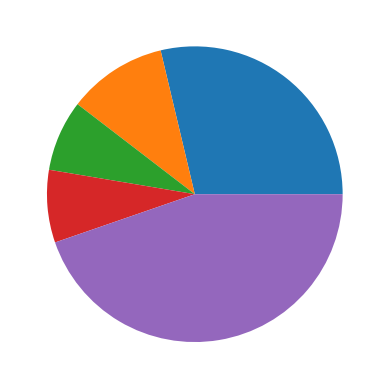

In [228]:
# Let's create a pie chart 

plt.pie(reason_counts);


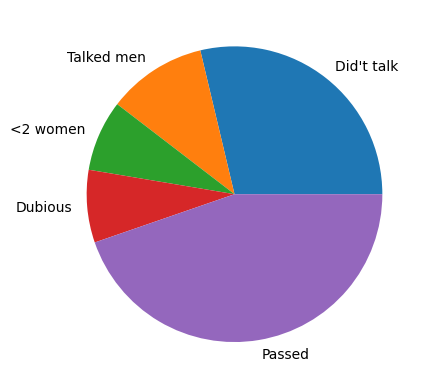

In [229]:
# Let's add names to the each section of the pie chart

plt.pie(reason_counts, labels= reason_names);


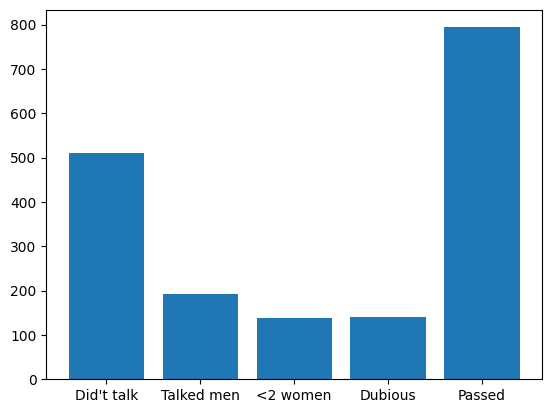

In [230]:
# Let's create a bar chart of how many players there are at each position
plt.bar(reason_names, reason_counts);


### What is wrong with this plot???

See: https://xkcd.com/833/


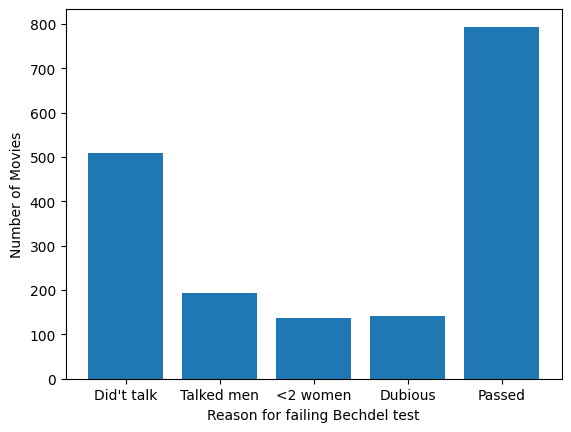

In [231]:
# Let's make a better version of the bar plot!

plt.bar(reason_names, reason_counts);
plt.ylabel("Number of Movies");
plt.xlabel("Reason for failing Bechdel test");


## Quantitative data: statistics and plots

Quantitative data is numeric data (e.g., ints and floats).
- We can visualize quantitative data using histograms and boxplots. 
- The main statistics we use to sumarize the central tendency of quantitative data are the mean and the median.  

Let's explore this by looking at data on movies. In particular, we will look at the following variables:
- `domgross_2013`: The amount of money a movie made at the box office (in 2013 inflation adjusted dollars)
- `domgross_2013`: The amount of money spent making the movie (in 2013 inflation adjusted dollars)
- `year`: The year the movie was made. 


In [232]:
# get these later with the quantitative data section
domgross_2013 = movies["domgross_2013"].to_list()
budget_2013 = movies["budget_2013"].to_list() 
year = movies["year"].to_list()

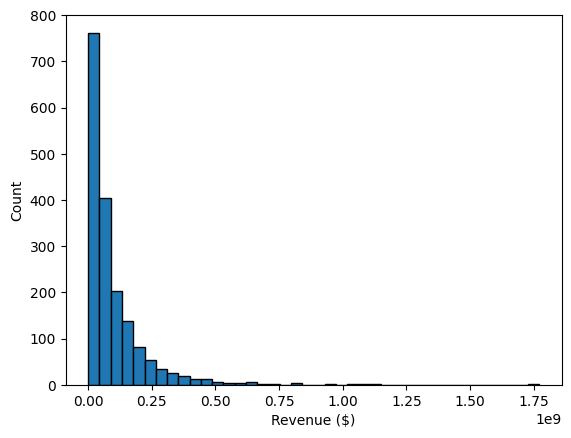

In [233]:
# plot a histogram of movie revenues
plt.hist(domgross_2013, edgecolor = "k", bins = 40);
plt.ylabel("Count")
plt.xlabel("Revenue ($)");

In [234]:
# What is the average movie revenue?
tot_revenue = sum(domgross_2013)
ave_revenue = tot_revenue/len(domgross_2013)
f"The average revenue of movies is {ave_revenue:,.0f}"

'The average revenue of movies is 95,174,784'

In [235]:
# we can also use the statistics module to calculate statistics 
import statistics


In [236]:
# get the mean using the statistics package
statistics.mean(domgross_2013)


95174783.57601352

In [237]:
# get the median using the statistics package
statistics.median(domgross_2013)


55993640.5

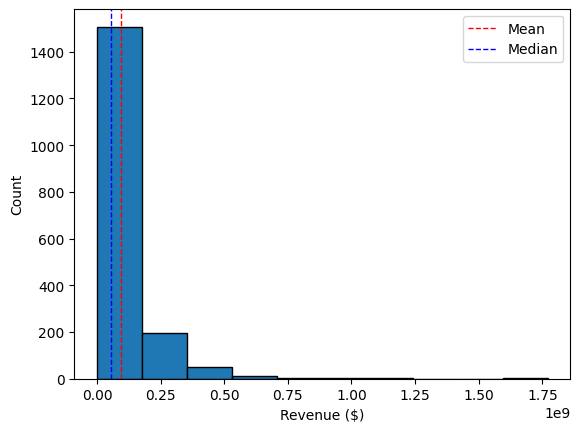

In [238]:
# plot the mean and the median on top of a histogram of salaries

plt.hist(domgross_2013, edgecolor = "k");
plt.ylabel("Count")
plt.xlabel("Revenue ($)");

plt.axvline(statistics.mean(domgross_2013), color='r', linestyle='dashed', linewidth=1, label = "Mean");
plt.axvline(statistics.median(domgross_2013), color='b', linestyle='dashed', linewidth=1, label = "Median");
plt.legend();


### Why is the mean larger than the median? 


In [239]:
# Some fake data
my_data = [2, 3, 5, 7, 100000]


In [240]:
# Get the mean 
statistics.mean(my_data)


20003.4

In [241]:
# Get the median
statistics.median(my_data)


5

## Outliers

Outliers are values that are much larger or smaller than the rest of the data. When an outlier occurs in a dataset we should investigate what might be causing the outlier.
- If it is due to a mistake (e.g., a data entry error) we can remove the outlier from our data.
- If it is a real value, we should understand how the value will impact our conclusions. 

Let's see if we can find the outlier in our movie revenue data. In particular, let's do the following:

1. We will use the `max()` to find the movie that had the highest revenue in the `domgross_2013` list
2. We will then use the `list.index()` method to find the index where this value occurs in the `domgross_2013` list
3. We can the use this index in the `title` list to get the movie title that has the maximum revenue



In [242]:
# Movie that had the highest revenue
max_revenue = max(domgross_2013)

# The index of where the highest revenue appears in the domgross_2013 list
index_max_revenue = domgross_2013.index(max_revenue)

# Print the index
print(index_max_revenue)

# Print the title of the movie at the corresponding index
print(title[index_max_revenue])



1742
Star Wars


## Meassures of spread: standard deviation and z-scores

Above we looked a measures of central, namely the mean and the median. Let's now look at statistics that measure how widely data is spread away from the mean. In particular, we will look at a commonly used measure called *the standard deviation* which is defined as:

$$s = \sqrt{\frac{1}{n-1}\sum_{i =1}^n (x_i - \bar{x})^2}$$

Where:
- $n$ is the number of data points you have
- $x_i$ is the $i^{th}$ data point
- $\bar{x}$ is the mean of the data

In Python, we can use the `stdev()` function from the statistics module to get the standard deviation



In [243]:
# Get the standard deviation of movie revenue

statistics.stdev(domgross_2013)

125965348.89270209

## z-scores 

Z-scores are used assess how many standard deviations a value is above or below the mean. Z-scores are defined as:

$z = \frac{x_i - \bar{x}}{s_x}$

Where:
- $\bar{x}$ is the mean of the data
- $x_s$ is the standard deviation of the data


In [244]:
# Calculate LeBron James' z-scores

z_FGPct = (0.510  -  0.464)/0.053
z_Points = (2111 - 	994)/414
z_Assists	 =  	(554 - 220)/170		
z_Steals	 =	(124 -  68.2)/31.5

print(f"Shooting % z-score: {z_FGPct:.3f}")
print(f"Points  z-score: {z_Points:.3f}")
print(f"Assists  z-score: {z_Assists:.3f}")
print(f"Steals  z-score: {z_Steals:.3f}")


Shooting % z-score: 0.868
Points  z-score: 2.698
Assists  z-score: 1.965
Steals  z-score: 1.771


In [245]:
# calculate z-sccore for star wars revenue (domgross_2013)

# Revenue of star wars
starwars_value = max(domgross_2013)

print(starwars_value)

# mean of all movies
movie_mean = statistics.mean(domgross_2013)

# standard deviation of all movies
movie_stdev = statistics.stdev(domgross_2013)

# star wars z-score
zscore_starwars = (starwars_value - movie_mean)/movie_stdev

zscore_starwars

1771682790.0


13.309279267364586

## Visualizing two quantitative variables

Let's create a scatter plot to visualize the relationship between a movies budget and the movie revenue made. 

Based on looking at this plot:
1. Does it appear that movies with larger budgets make more money at the box office?
2. What do you think the correlation is between buget and revenue? 


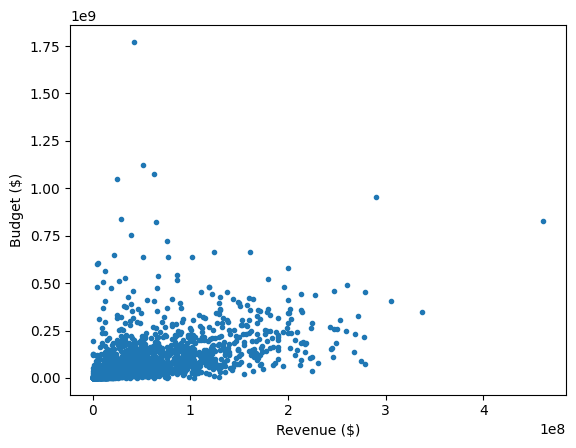

In [246]:
# plot revenue as a function of budget

plt.plot(budget_2013, domgross_2013, '.');
plt.ylabel("Budget ($)");
plt.xlabel("Revenue ($)");

In [247]:
# Calculate the correlation 

statistics.correlation(budget_2013, domgross_2013)

0.46126114596466505

In [248]:
%%capture

# You can run this code to covert this Jupyter notebook into a pdf
!quarto render class_04_answers.ipynb --cache-refresh --to pdf 